Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



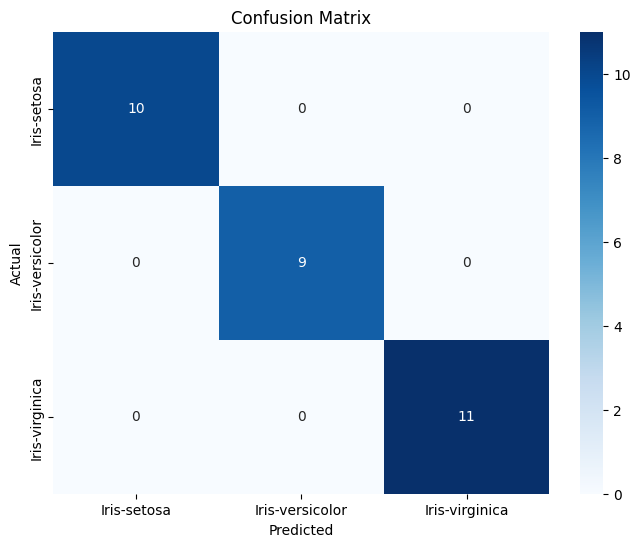

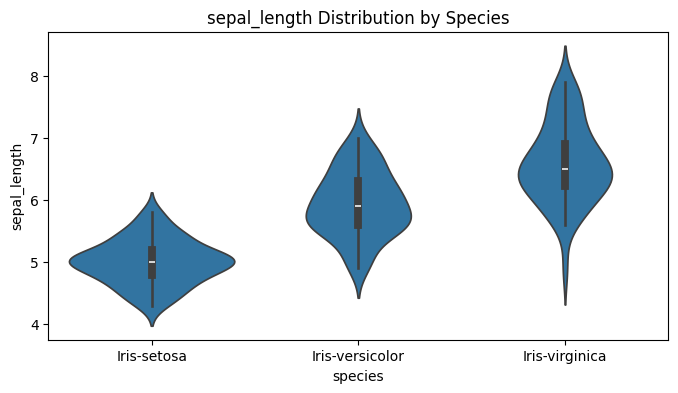

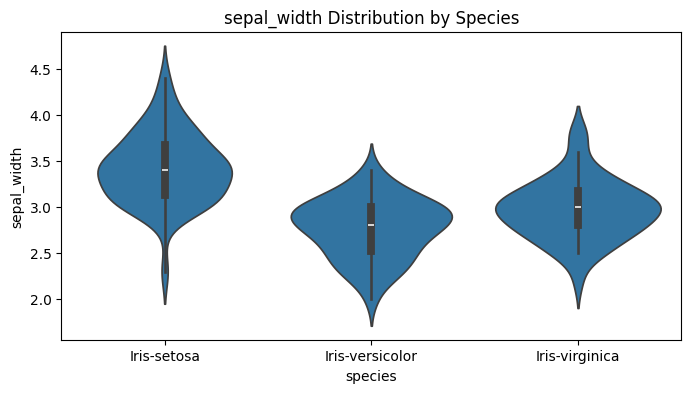

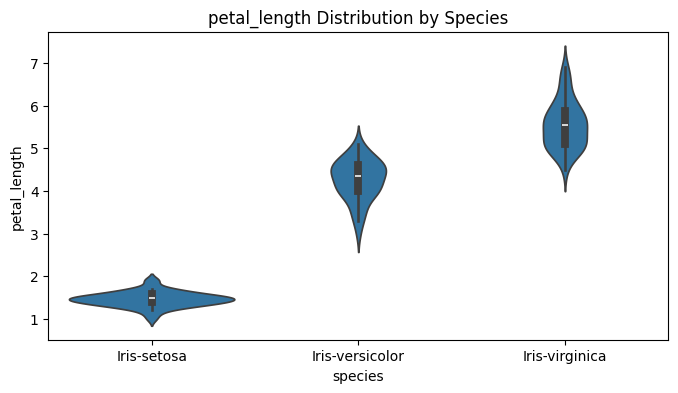

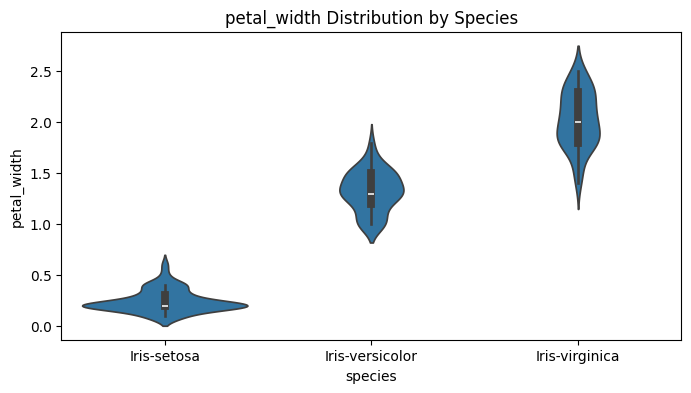

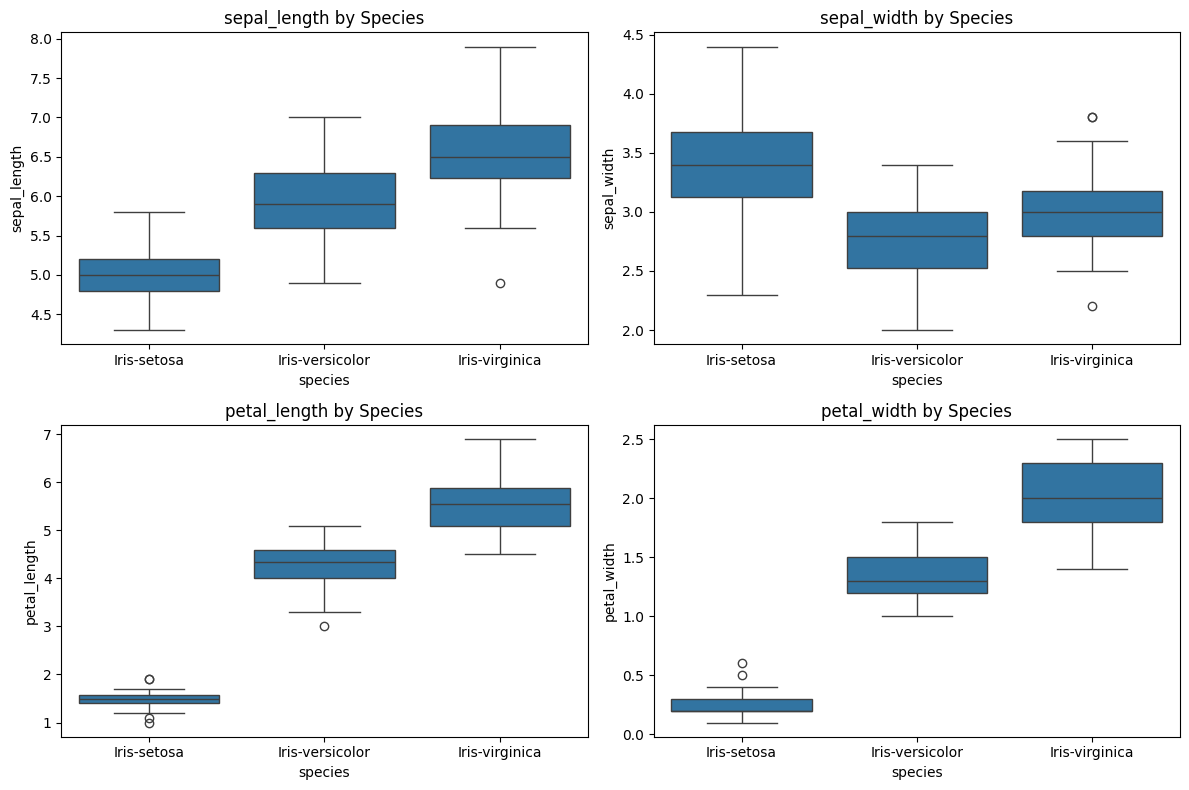

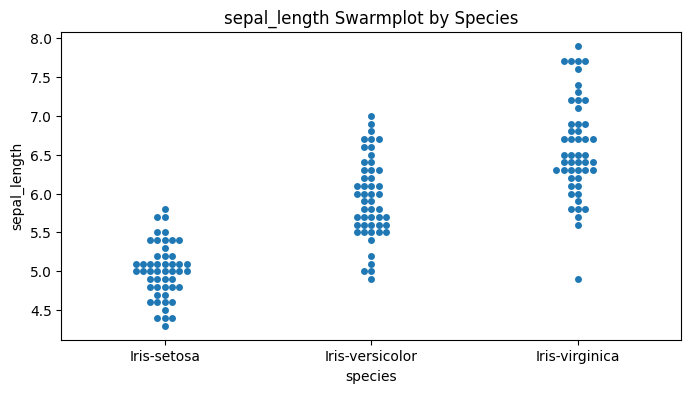

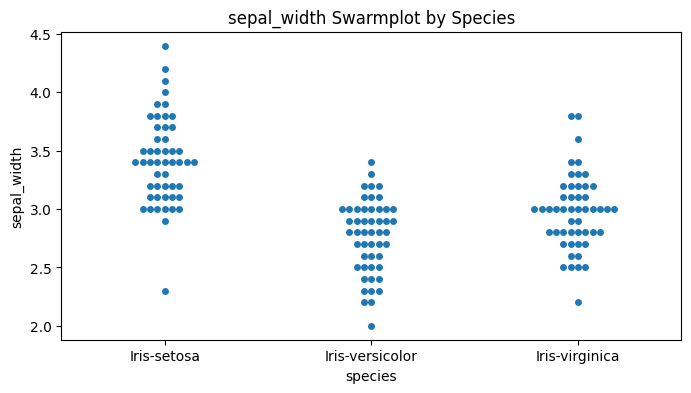

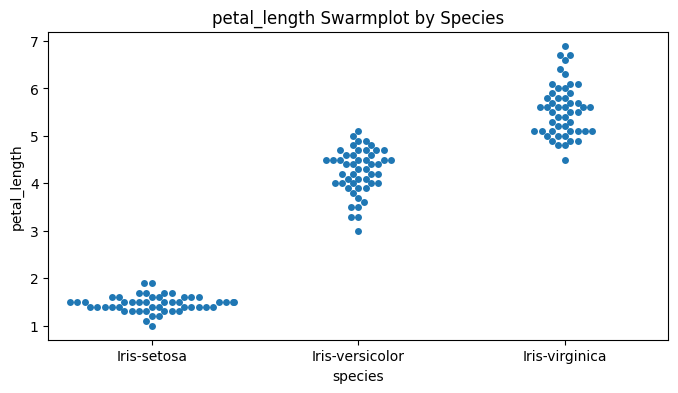

c:\Users\avina\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


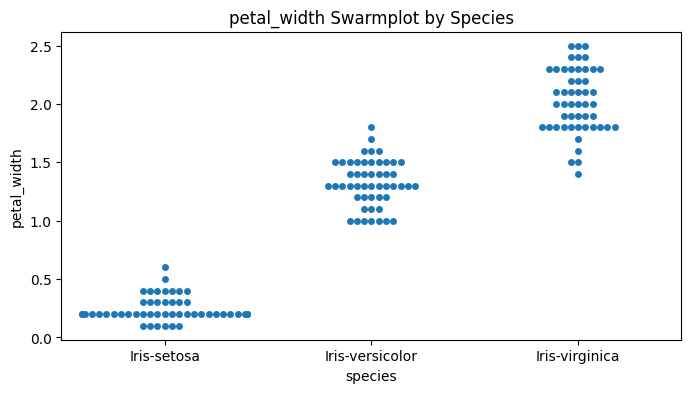

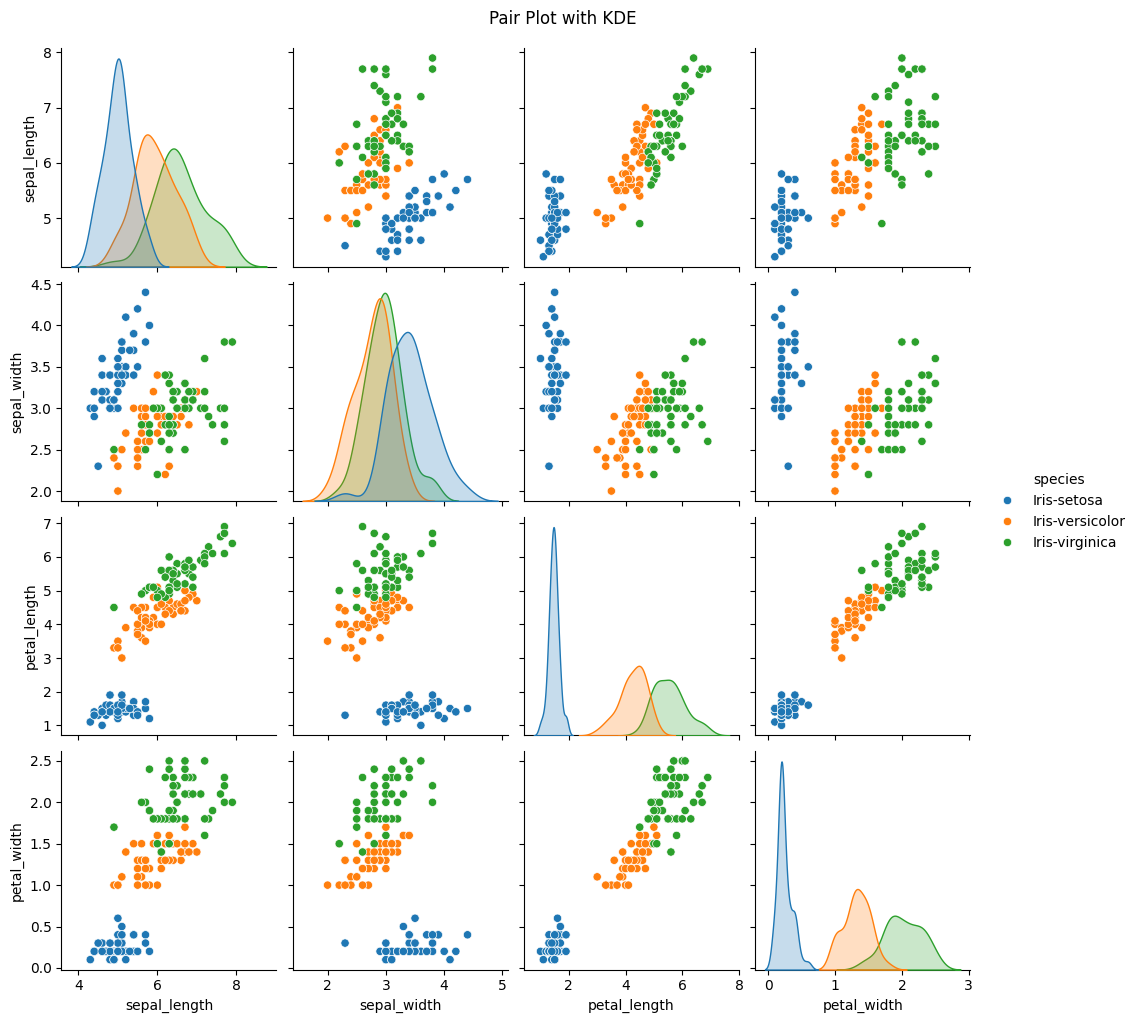

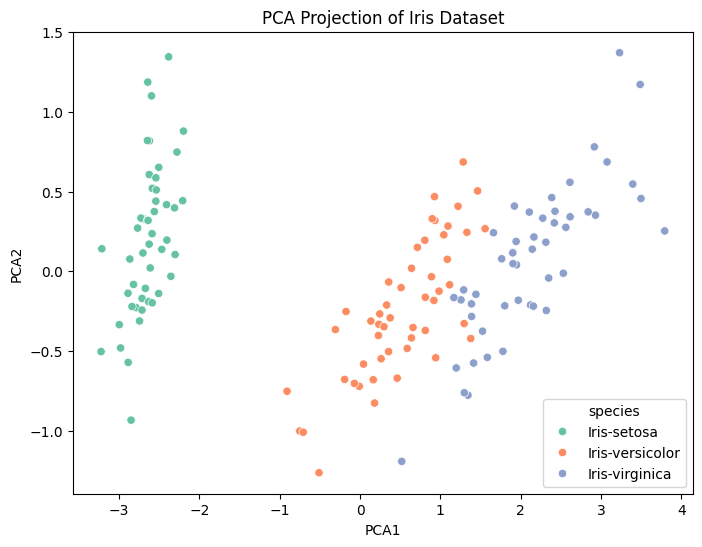

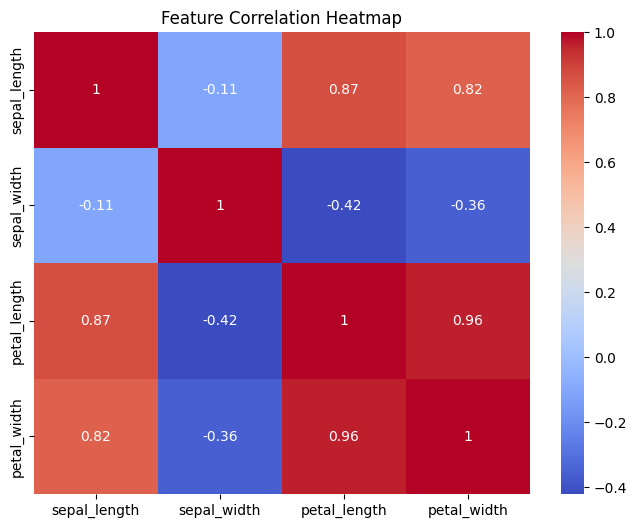

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("C:/Users/avina/Downloads/archive (8)/IRIS.csv")

# Feature and target variables
X = df.iloc[:, :-1]  # All columns except the target column
y = df['species']    # Target column (species)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualizations
for col in df.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='species', y=col, data=df)
    plt.title(f'{col} Distribution by Species')
    plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'{col} by Species')
plt.tight_layout()
plt.show()

for col in df.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.swarmplot(x='species', y=col, data=df)
    plt.title(f'{col} Swarmplot by Species')
    plt.show()

sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle("Pair Plot with KDE", y=1.02)
plt.show()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :-1])
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['species'] = df['species']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='species', data=df_pca, palette='Set2')
plt.title("PCA Projection of Iris Dataset")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
